# Loop over g values and return power spectra

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from SchroPoissonSolver import fdmSimulation, Center
from PowerSpectrum import PowerSpectrum

def Gaussian(k, A, k0):
#     return A*np.exp(-k**2/k0**2)
    return A*np.exp(-k/k0)

rho0 = np.loadtxt("Simulation Runs\\rho0_N512.csv", delimiter=",")

N = np.shape(rho0)[0]

g_vals = np.arange(-0.01, 0.01, 0.0005)

T  = 0.25# time at which simulation ends
dt = 0.0001  # timestep

power_spectra = []
Amps = []
cutoffs = []
lengths = []
errors = []
start = 45 # starting index for the fit, ignoring low k's
end = 160 # ending index, ignoring high k's

i = 0

for g in g_vals:
    psi, delta, theta_field = fdmSimulation(rho0 , g, T, dt)
    
    tshape = np.shape(psi)[0]
    # start = start_time
    start_t = 2400
    spectra = np.zeros((tshape-start_t , N-1))

    for j in range(tshape-start_t):
        k_modes, spectra[j, :] = PowerSpectrum(np.abs(psi[j+start_t,:,:])**2)

    power_spectra.append(np.average(spectra, axis=0)) 
#     std = np.std(spectra, axis=0)
    popt, pcov = curve_fit(Gaussian, k_modes[start:end], power_spectra[i][start:end], [100, 60])
    Amps.append(popt[0])
    cutoffs.append(popt[1])
    lengths.append(1/popt[1])
    errors.append(pcov[1][1])
    i += 1


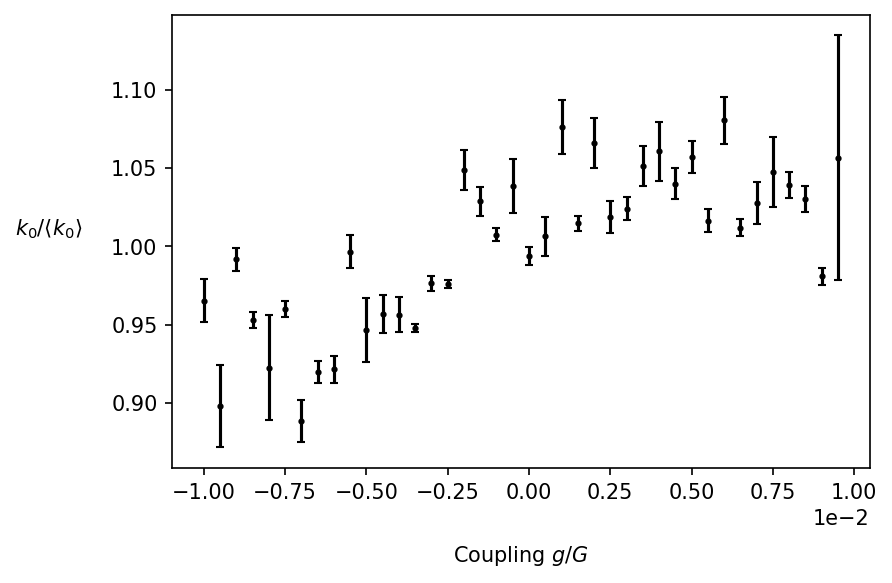

In [86]:
plt.figure(dpi = 150)
plt.errorbar(g_vals, cutoffs / np.average(cutoffs) , errors /np.average(cutoffs), fmt="o" , capsize=2, markersize = 2, color = "k")
plt.xlabel(r"Coupling $g/G$", labelpad = 20)
plt.ylabel(r"$k_0/\langle k_0 \rangle$", rotation = 0, labelpad = 30, )
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

In [31]:
np.savetxt("g_vals.csv", g_vals, delimiter=",")
np.savetxt("power_spectra.csv", power_spectra, delimiter=",")

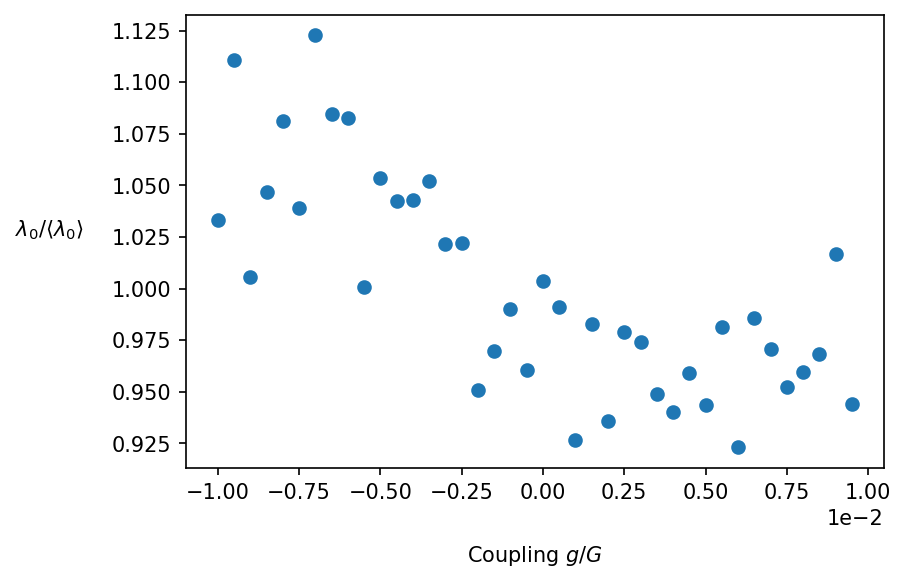

In [85]:
plt.figure(dpi = 150)
# plt.errorbar(g_vals, lengths / np.average(lengths) , errors /(lengths)**2, fmt="o" , capsize=2, markersize = 2, color = "k")
plt.scatter(g_vals, lengths / np.average(lengths))
plt.xlabel(r"Coupling $g/G$", labelpad = 20)
plt.ylabel(r"$\lambda_0/\langle \lambda_0 \rangle$", rotation = 0, labelpad = 30, )
# plt.plot(g_vals, .04/(g_vals+.2)**2)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()